In [2]:
# Step 1: Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt




In [3]:
df = pd.read_csv("700 AI & Data Jobs.csv")
df.head()

# Strip whitespace from column names (just in case)
df.columns = df.columns.str.strip()

# Quick preview
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (735, 14)


,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...


In [4]:
print(df.columns.tolist())



['company', 'rating', 'location', 'positionName', 'description', 'salary', 'url', 'jobType/0', 'jobType/1', 'jobType/2', 'jobType/3', 'searchInput/country', 'searchInput/position', 'externalApplyLink']


In [5]:
# Check for missing values in key columns
print("Missing 'positionName' values:", df["positionName"].isna().sum())
print("Missing 'location' values:", df["location"].isna().sum())

# Drop rows missing essential info (Job Title or Location)
df_clean = df.dropna(subset=["positionName", "location"]).copy()

# Combine jobType columns into one string column 'work_type_combined'
jobtype_cols = [col for col in df_clean.columns if col.startswith("jobType")]
df_clean["work_type_combined"] = df_clean[jobtype_cols].apply(
    lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# Fill missing 'work_type_combined' with 'Unknown'
df_clean["work_type_combined"] = df_clean["work_type_combined"].replace('', 'Unknown')

# Reset index for cleaned dataframe
df_clean = df_clean.reset_index(drop=True)

# Check cleaned data
print(f"Original rows: {len(df)}, Cleaned rows: {len(df_clean)}")
df_clean.head(3)

Missing 'positionName' values: 0
Missing 'location' values: 0
Original rows: 735, Cleaned rows: 735


,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink,work_type_combined
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...,Full-time
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...,Full-time
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...,Full-time


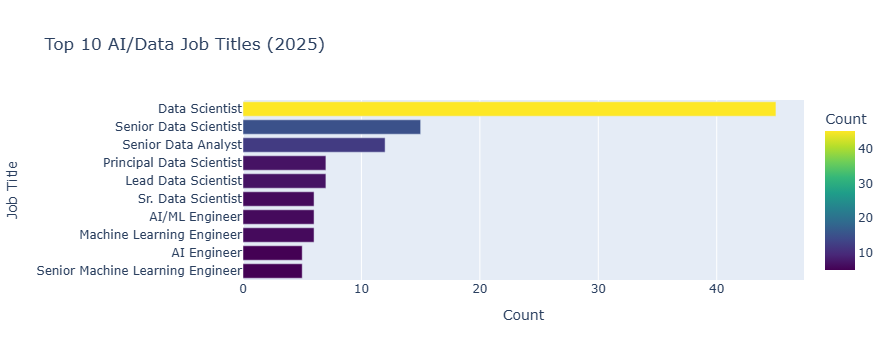

In [8]:
# 1️⃣ Top 10 Job Titles
top_jobs = df_clean["positionName"].value_counts().nlargest(10).reset_index()
top_jobs.columns = ["Job Title", "Count"]

fig = px.bar(top_jobs,
             x="Count",
             y="Job Title",
             orientation="h",
             title="Top 10 AI/Data Job Titles (2025)",
             color="Count",
             color_continuous_scale="Viridis")
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

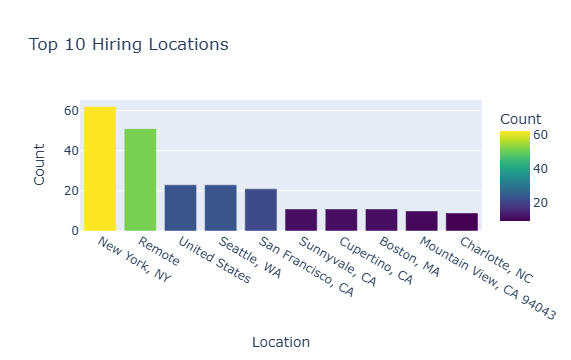

In [25]:
# 2️⃣ Top 10 Hiring Locations
top_locations = df_clean["location"].value_counts().nlargest(10).reset_index()
top_locations.columns = ["Location", "Count"]

fig = px.bar(top_locations,
             x="Location",
             y="Count",
             title="Top 10 Hiring Locations",
             color="Count",
             color_continuous_scale="Viridis")
fig.show()


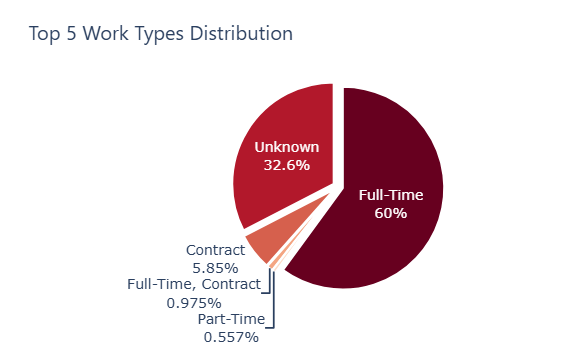

In [39]:
# Top 5 work types
import plotly.express as px

# Ensure column names are clean
work_type_counts.columns = ['Work Type', 'Count']

# Optional: Capitalize work type names
work_type_counts['Work Type'] = work_type_counts['Work Type'].str.title()

# Select only the top 5
top5_work_types = work_type_counts.nlargest(5, 'Count')

# Pie Chart (Top 5)
fig = px.pie(
    top5_work_types,
    names='Work Type',
    values='Count',
    title='Top 5 Work Types Distribution ',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(
    textinfo='percent+label',
    textfont_size=14,
    marker=dict(line=dict(color='white', width=2)),
    pull=[0.05] * len(top5_work_types),
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Share: %{percent}<extra></extra>'
)

fig.update_layout(
    title_font_size=20,
    title_font_family="Segoe UI",
    showlegend=False,
    margin=dict(t=80, b=40, l=20, r=20),
    paper_bgcolor='white',
)

fig.show()


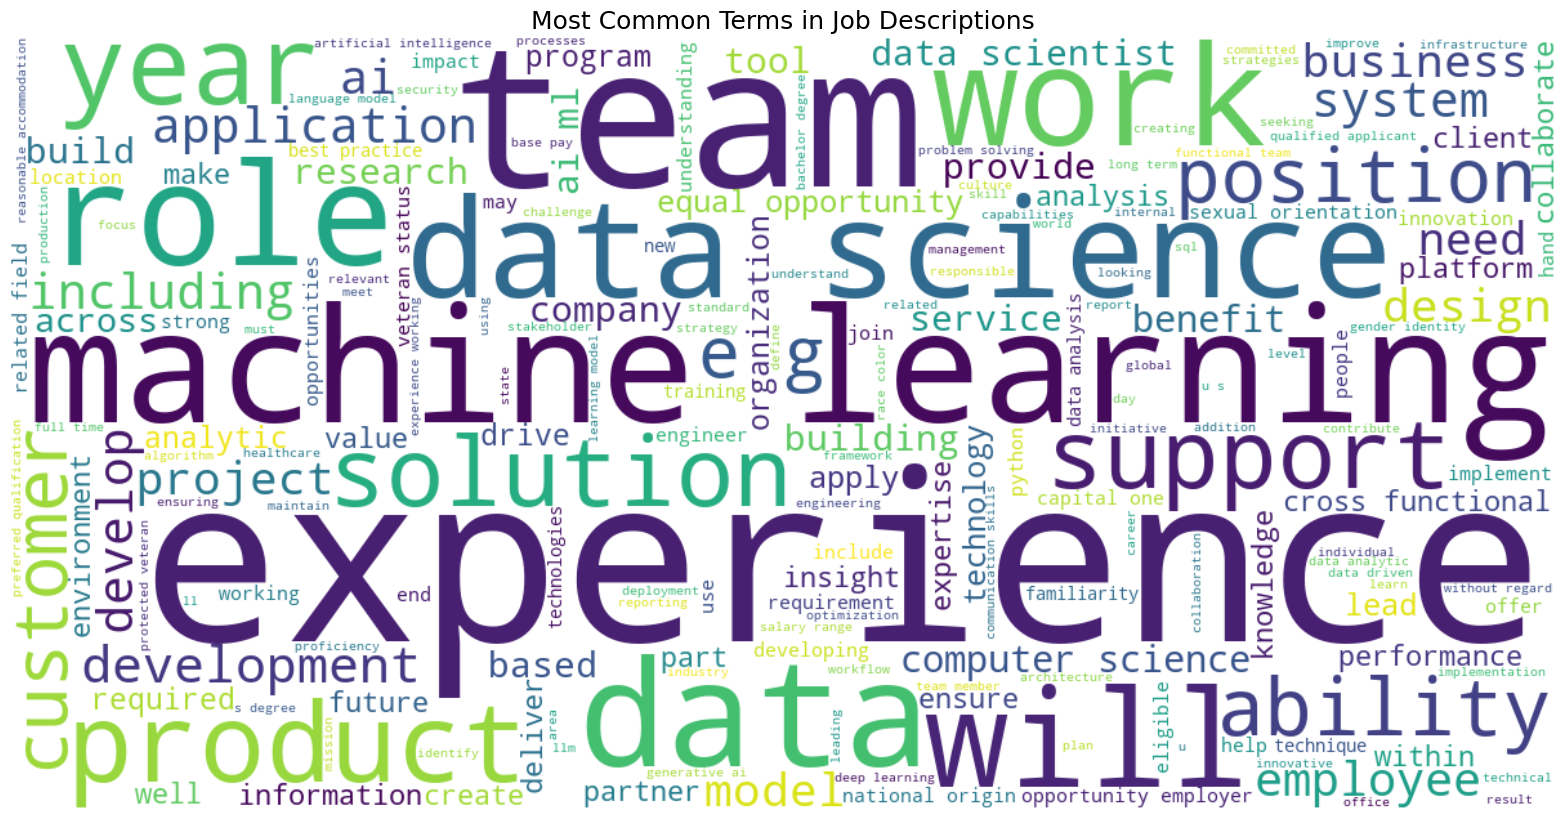

In [40]:
# Most common terms in job descriptions
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Only run if 'description' column exists
if "description" in df_clean.columns:
    all_text = df_clean["description"].str.lower().str.cat(sep=' ')

    # Create a larger, high-res word cloud
    wordcloud = WordCloud(
        width=1200,
        height=600,
        max_words=200,
        background_color="white",
        colormap='viridis',       # elegant color palette
        contour_width=0.5,
        contour_color='gray',
        random_state=42
    ).generate(all_text)

    # Display the word cloud
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most Common Terms in Job Descriptions", fontsize=18)
    plt.tight_layout(pad=0)
    plt.show()
